## Predict HIV Progression

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns

In [72]:
# Read the data
data = pd.read_csv("training_data.csv")

In [73]:
# Find the shape
data.shape

(1000, 6)

In [74]:
# Have a quick look at the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  1000 non-null   int64  
 1   Resp       1000 non-null   int64  
 2   PR Seq     920 non-null    object 
 3   RT Seq     1000 non-null   object 
 4   VL-t0      1000 non-null   float64
 5   CD4-t0     1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [75]:
# check the records
data.head()

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.3,145
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.6,224
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.2,1017
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.7,206
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.5,572


In [76]:
# list the data columns
list(data)

['PatientID', 'Resp', 'PR Seq', 'RT Seq', 'VL-t0', 'CD4-t0']

In [77]:
data = data[['PatientID', 'Resp', 'VL-t0', 'CD4-t0']]

In [78]:
# check for the null records
data.isna().sum()

PatientID    0
Resp         0
VL-t0        0
CD4-t0       0
dtype: int64

- There is no missinmg value, hence It can be said that data is cleaned

In [79]:
# check for the value count
data['Resp'].value_counts()

0    794
1    206
Name: Resp, dtype: int64

- It can be seen that there is a class inbalance data.

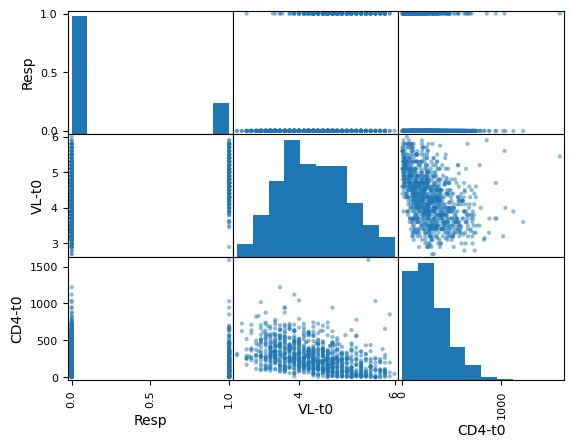

In [80]:
# check the relation between the variables
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data.drop(['PatientID'],axis = 1))
plt.show()

- It can be seen that there no relation between the variables, but there can be some outliers

<AxesSubplot:title={'center':'CD4-t0'}, xlabel='Resp'>

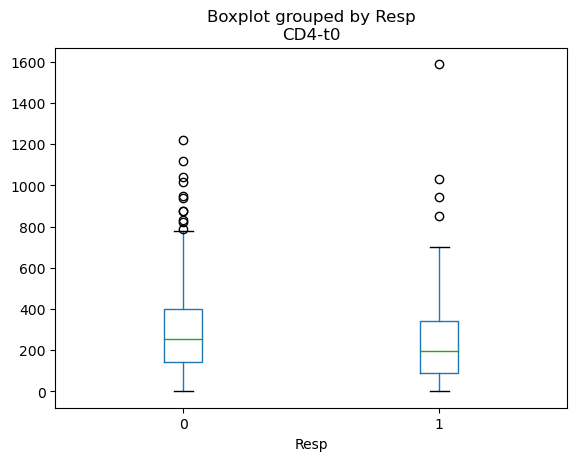

In [82]:
# check for the outliers for [CD4-t0]
data.boxplot(by = 'Resp',column = ['CD4-t0'],grid = False)

<AxesSubplot:title={'center':'VL-t0'}, xlabel='Resp'>

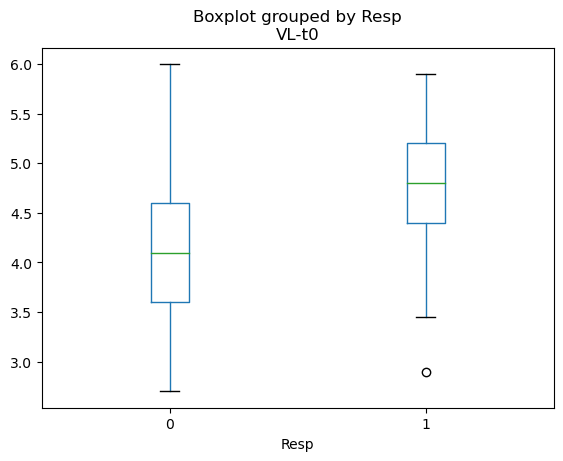

In [83]:
# checking for the outliers for [VL-t0]
data.boxplot(by = 'Resp',column = ['VL-t0'],grid = False)

### Apply Various Machine Learning Classification Models

In [85]:
# split the data into train and test
from sklearn.model_selection import train_test_split

In [86]:
X = data[['VL-t0','CD4-t0']].values
Y = data[['Resp']].values

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state =2 )

### Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

C:\Users\nasit\anaconda3\envs\DAB303\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

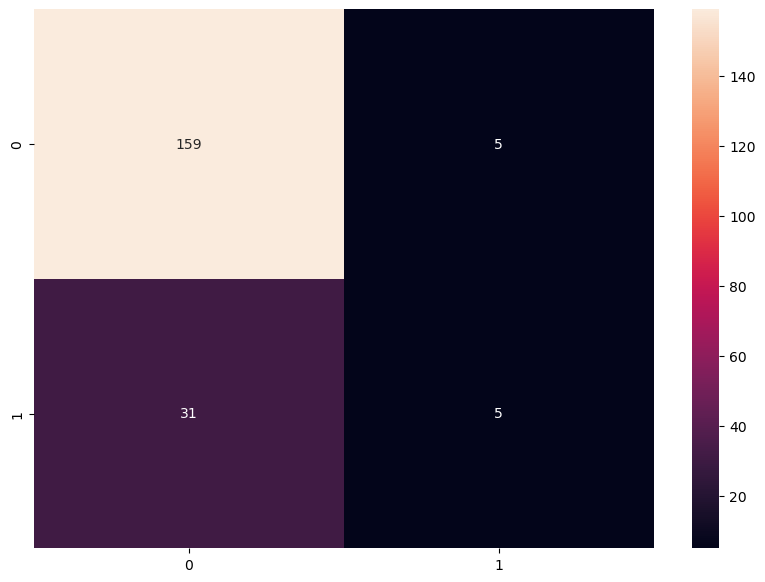

In [92]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       164
           1       0.50      0.14      0.22        36

    accuracy                           0.82       200
   macro avg       0.67      0.55      0.56       200
weighted avg       0.78      0.82      0.78       200



### Random Forest Model

C:\Users\nasit\AppData\Local\Temp\ipykernel_2776\4244918344.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


<AxesSubplot:>

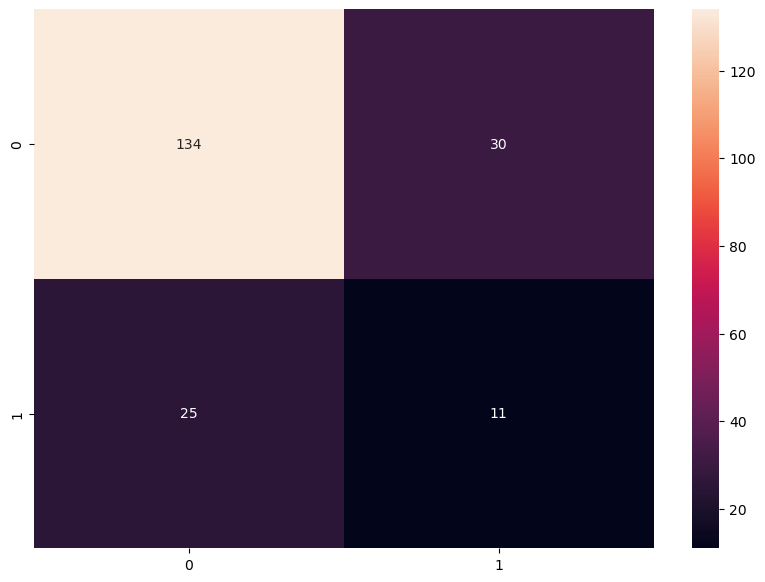

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = rfc.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       164
           1       0.27      0.31      0.29        36

    accuracy                           0.73       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.74      0.72      0.73       200



### Decision Tree Model

<AxesSubplot:>

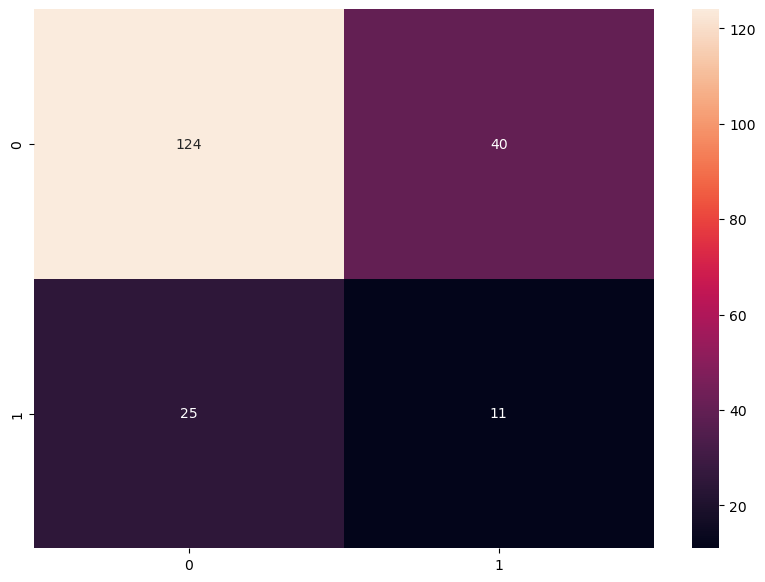

In [103]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = tree.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       164
           1       0.22      0.31      0.26        36

    accuracy                           0.68       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.72      0.68      0.70       200



### Support Vector Machine SVM Model

C:\Users\nasit\anaconda3\envs\DAB303\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

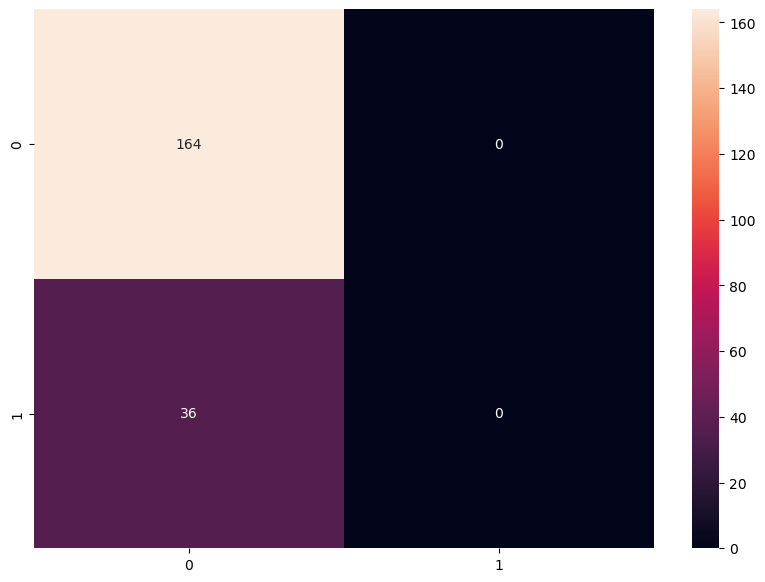

In [98]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = svm.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       164
           1       0.00      0.00      0.00        36

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.67      0.82      0.74       200



C:\Users\nasit\anaconda3\envs\DAB303\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nasit\anaconda3\envs\DAB303\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nasit\anaconda3\envs\DAB303\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN Model

C:\Users\nasit\anaconda3\envs\DAB303\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<AxesSubplot:>

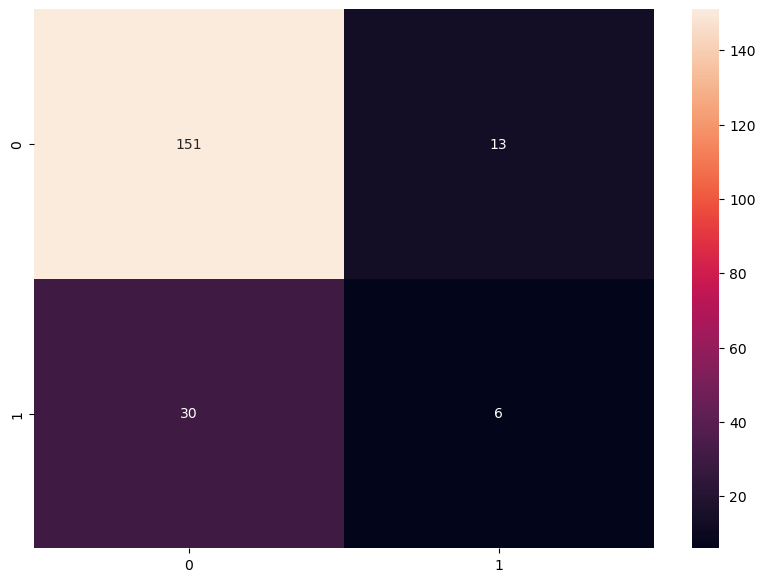

In [100]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = neigh.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       164
           1       0.32      0.17      0.22        36

    accuracy                           0.79       200
   macro avg       0.58      0.54      0.55       200
weighted avg       0.74      0.79      0.76       200



### Naive Bayes Model

C:\Users\nasit\anaconda3\envs\DAB303\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

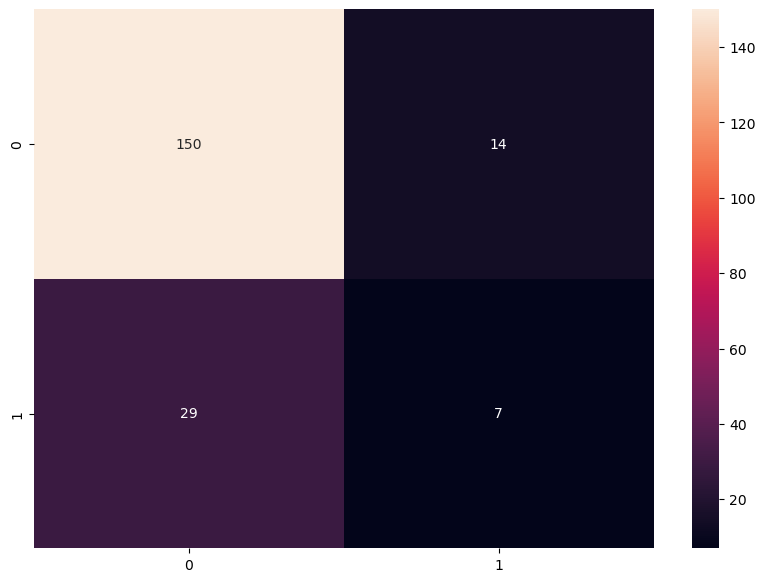

In [102]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = GNB.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       164
           1       0.33      0.19      0.25        36

    accuracy                           0.79       200
   macro avg       0.59      0.55      0.56       200
weighted avg       0.75      0.79      0.76       200



- Overall, It can be seen that all the model has accuracy between the 80-82% except Decision Tree model. But precision and recall for class 1 is poor as compare to class 0. This is because for imbalanced data.

### Synthetic Minority Oversampling Technique (SMOTE) as data is imbalanced

With the Synthetic Minority Oversampling Technique (SMOTE), a point from the minority class is randomly chosen, and its k-nearest neighbours are determined. The synthetic points are added between the chosen point and its neighbours.

In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
smote = SMOTE()

In [117]:
x_smote, y_smote = smote.fit_resample(X, Y)

In [120]:
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.2, random_state =2 )

### Logistic Regression after SMOTE

<AxesSubplot:>

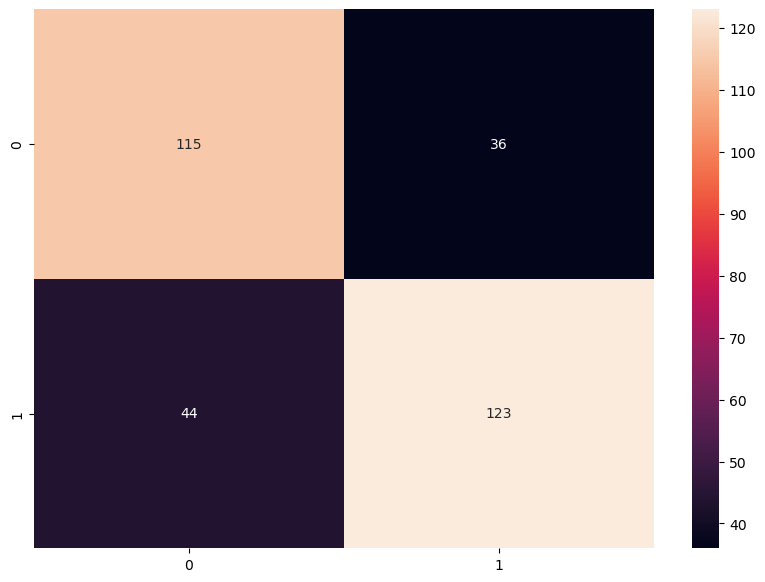

In [128]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       151
           1       0.77      0.74      0.75       167

    accuracy                           0.75       318
   macro avg       0.75      0.75      0.75       318
weighted avg       0.75      0.75      0.75       318



### Random Forest Model after SMOTE

array([[119,  32],
       [ 22, 145]], dtype=int64)

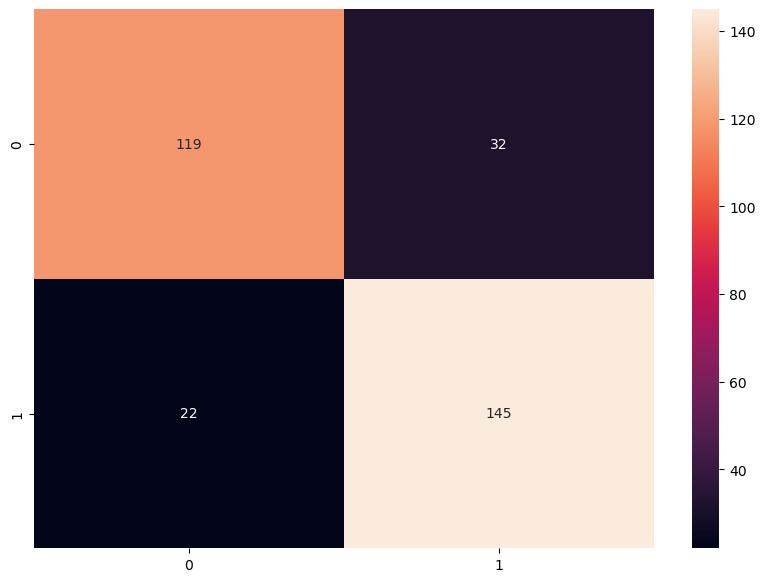

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = rfc.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.82      0.84      0.83       167

    accuracy                           0.82       318
   macro avg       0.82      0.82      0.82       318
weighted avg       0.82      0.82      0.82       318



### Decision Tree Model after SMOTE

<AxesSubplot:>

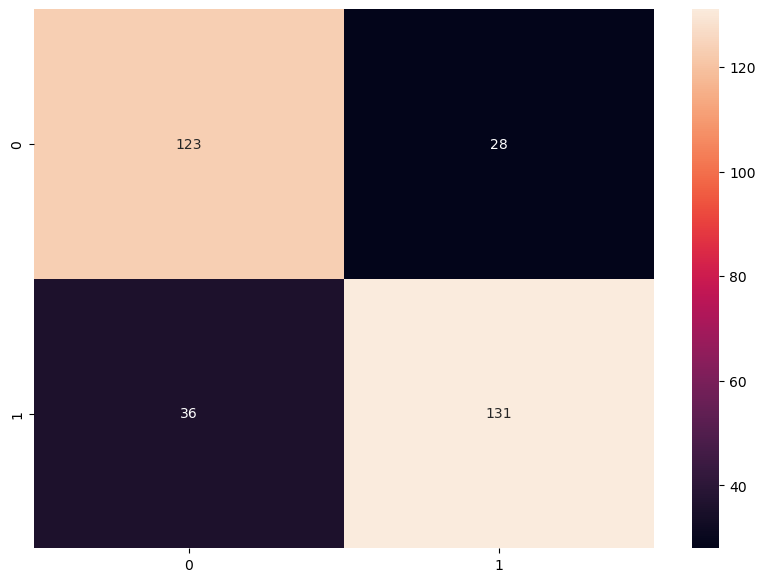

In [132]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = tree.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.82      0.78      0.80       167

    accuracy                           0.80       318
   macro avg       0.80      0.80      0.80       318
weighted avg       0.80      0.80      0.80       318



### Support Vector Machine SVM Model after SMOTE

<AxesSubplot:>

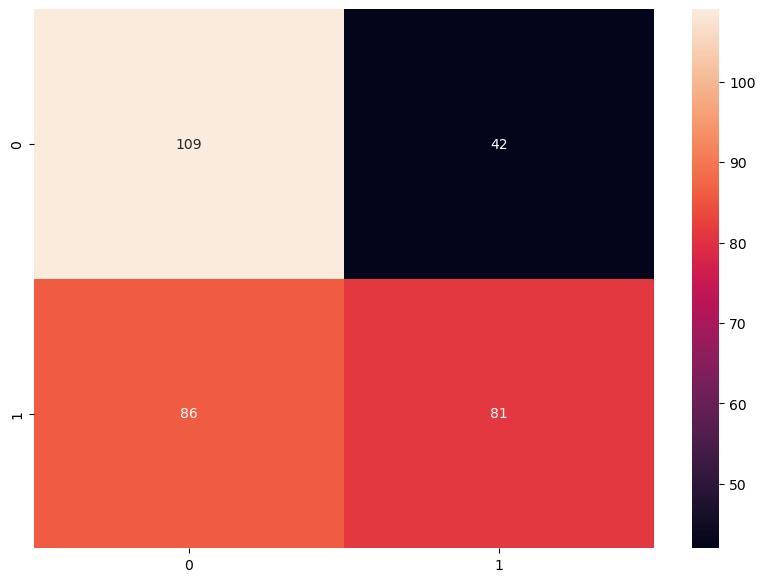

In [135]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = svm.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.72      0.63       151
           1       0.66      0.49      0.56       167

    accuracy                           0.60       318
   macro avg       0.61      0.60      0.59       318
weighted avg       0.61      0.60      0.59       318



### KNN Model after SMOTE

<AxesSubplot:>

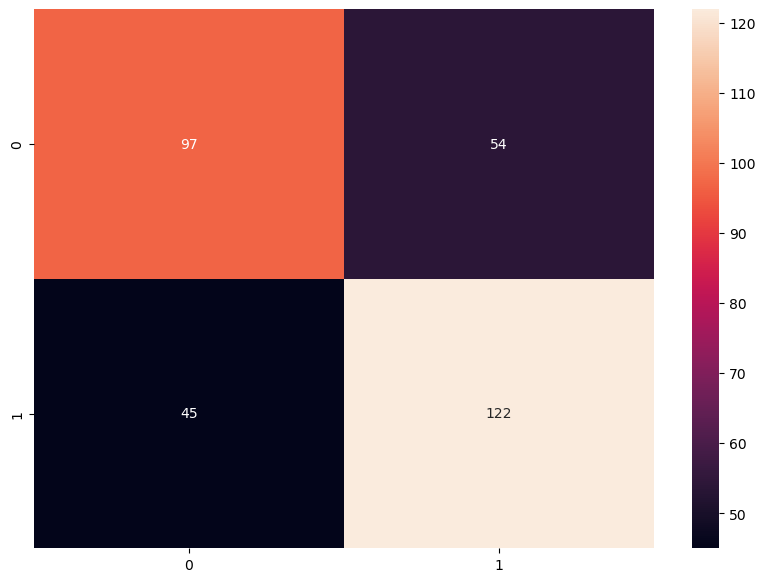

In [137]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = neigh.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       151
           1       0.69      0.73      0.71       167

    accuracy                           0.69       318
   macro avg       0.69      0.69      0.69       318
weighted avg       0.69      0.69      0.69       318



### Naive Bayes Model after SMOTE

<AxesSubplot:>

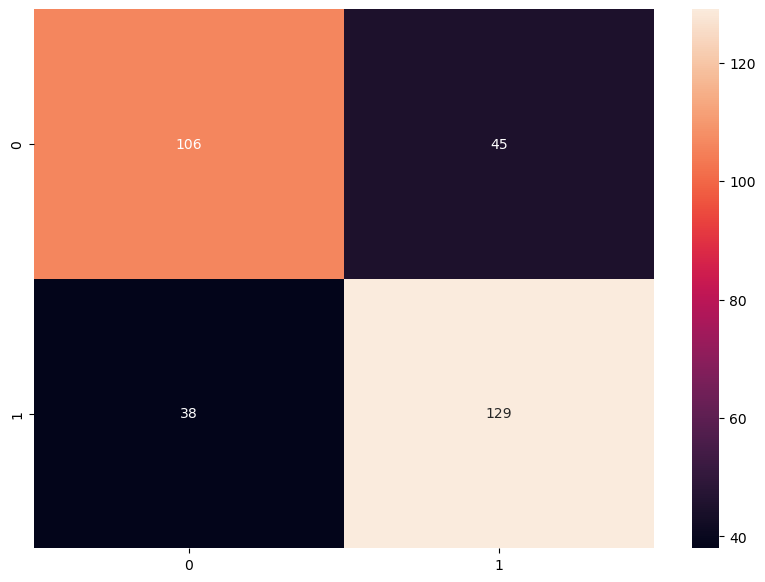

In [139]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = GNB.predict(X_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       151
           1       0.74      0.77      0.76       167

    accuracy                           0.74       318
   macro avg       0.74      0.74      0.74       318
weighted avg       0.74      0.74      0.74       318

